# Pymaceuticals Inc.
---

### Analysis

- by Andrea L. Hazzard
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
aggregate_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")

# Display the data table for preview
aggregate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
aggregate_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.

duplicates = aggregate_data.duplicated(subset=['Mouse ID','Timepoint'])
aggregate_data[duplicates]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

aggregate_data.drop(aggregate_data[aggregate_data['Mouse ID'] == "g989"].index, inplace=True)
aggregate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.

aggregate_data["Mouse ID"].nunique()

248

In [ ]:
# Show data types for future reference if needed
aggregate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Mean Tumor Volume by Regimen

mean_TVolume = aggregate_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

# Median Tumor Volume by Regimen

median_TVolume = aggregate_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

# Tumor volume variance by Regimen
var_TVolume = aggregate_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

# Tumor volume standard deviation by Regimen
sd_TVolume = aggregate_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

# Tumor volume Standard error of the means
sem_TVolume = aggregate_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Create summary dataframe


aggregate_stats = pd.DataFrame({"mean": mean_TVolume,
                                 "median": median_TVolume,
                                   "var": var_TVolume,
                                    "std": sd_TVolume,
                                     "sem": sem_TVolume})

aggregate_stats.index.name = None


aggregate_stats

,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#Xpert Learning Assistant used to understand the aggregate method, correct syntax.

aggregate_method = aggregate_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregate_method


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# get the values

regimen_data = aggregate_data["Drug Regimen"].value_counts()
regimen_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

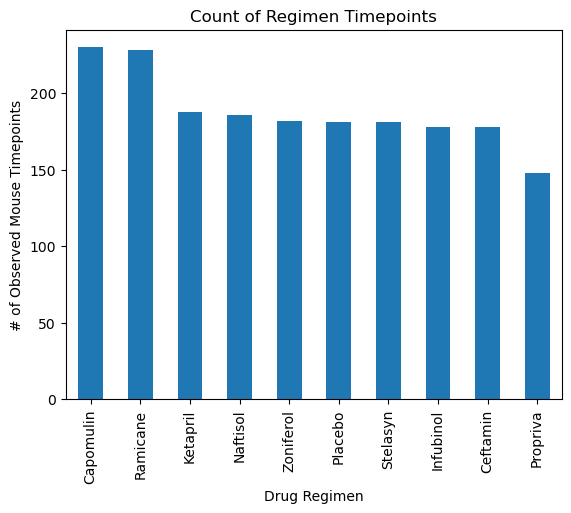

In [10]:
# create the plot with Pandas

regimen_chart = regimen_data.plot(kind= "bar", title="Count of Regimen Timepoints", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

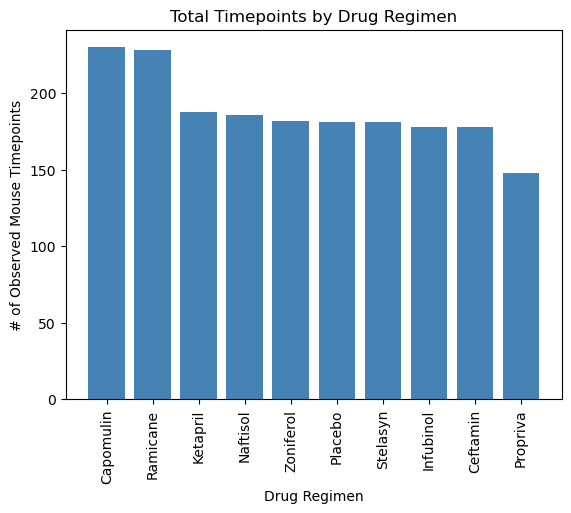

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot 
# Plot as a series, not as a dataframe, regime_data is a series. ChatGPT and Xpert Learning Assistant

plt.bar(regimen_data.index, regimen_data.values, color="steelblue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Timepoints by Drug Regimen")
plt.xticks(rotation=90)
plt.show

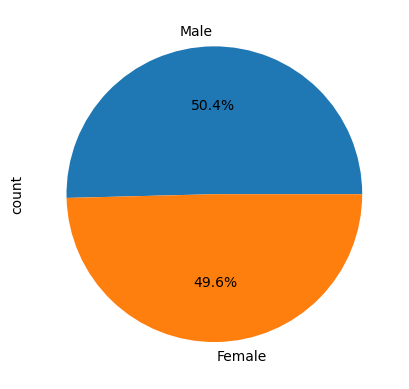

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


sex_data = aggregate_data[["Mouse ID", "Sex"]].drop_duplicates()
sex_counts = sex_data["Sex"].value_counts()
sex_chart = sex_counts.plot.pie(y="Sex", autopct='%1.1f%%')
#plt.show

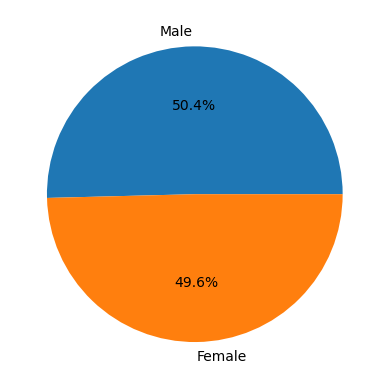

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

plt.pie(sex_counts, autopct='%1.1f%%', labels=sex_counts.index)
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse Xpert Learning Assistant for syntax on dataframe creation
max_timepoint = aggregate_data.groupby(["Mouse ID"])["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint = pd.merge(aggregate_data, max_timepoint, on=["Mouse ID", "Timepoint"], how="right")
final_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_type = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

outliers = {}


# Calculate the IQR and quantitatively determine if there are any potential outliers.
# ChatGPT and Xpert Learning Assist consulted for coding the loop


    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatment_type:
    regimen_outcome = final_timepoint[final_timepoint["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]
    tumor_volume.append(regimen_outcome)

for regimen, volumes in zip(treatment_type, tumor_volume):
    quartiles=volumes.quantile([0.25, 0.5, 0.75])


    q1 = quartiles[0.25]
    q3 = quartiles[0.75]

    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    treatment_outliers = volumes[(volumes < lower) | (volumes > upper)]
    outliers[regimen] = treatment_outliers.tolist()
   
    # Determine outliers using upper and lower bounds
for regimen, outliers_list in outliers.items():
    print(f"Outliers for {regimen}: {outliers_list}")

Outliers for Capomulin: []
Outliers for Ramicane: []
Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []


C:\Users\andre\AppData\Local\Temp\ipykernel_25280\294010271.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume, labels=treatment_type, flierprops=dict(marker="*", markerfacecolor="red", markersize=12))


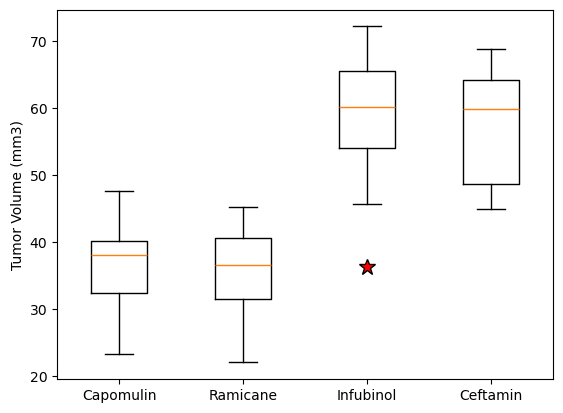

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume, labels=treatment_type, flierprops=dict(marker="*", markerfacecolor="red", markersize=12))
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

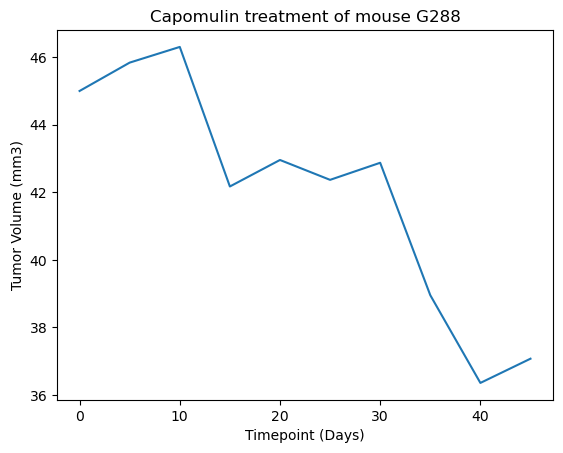

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# filter on my chosen mouse
mouse_g288 = aggregate_data.loc[aggregate_data["Mouse ID"] == "g288"]

# create plot
plt.plot(mouse_g288["Timepoint"],mouse_g288["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse G288")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

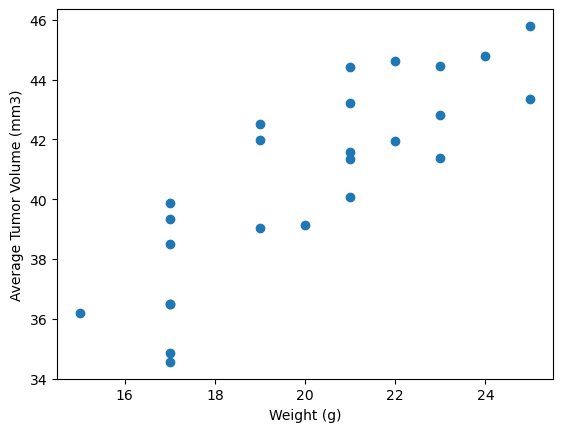

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# filter for capomulin data

capomulin = aggregate_data.loc[aggregate_data["Drug Regimen"] == "Capomulin"]

# get data for plotting
# reviewed raw data, noted each mouse only had 1 recorded weight

average_tumor_volume = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].first()

# create scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

The correlation coefficient for mouse weight and average observed tumor volume is 0.84


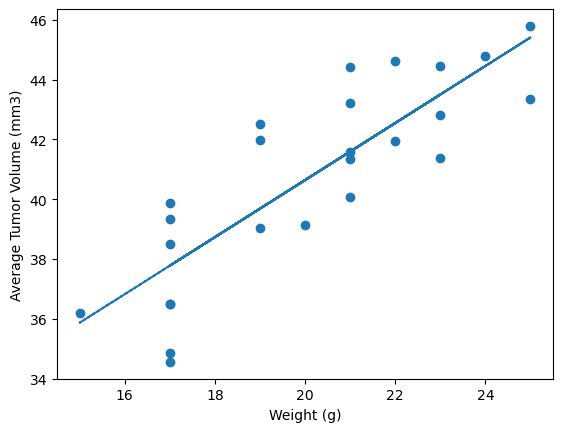

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation coefficient
correlation_coefficient = round(st.pearsonr(mouse_weight, average_tumor_volume)[0],2)
print(f"The correlation coefficient for mouse weight and average observed tumor volume is {correlation_coefficient}")

# plot
    

wt_slope, wt_int, wt_r, wt_p, wt_std_err = st.linregress(mouse_weight, average_tumor_volume)

wt_fit = wt_slope * mouse_weight + wt_int

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, wt_fit, "--")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

